<a href="https://colab.research.google.com/github/motoroko/Hatespeach_Detection/blob/main/HateSpeech_Using_Hybrid_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dataset

In [ ]:
df = pd.read_csv('Data_Hatespeach.csv')
df.sort_values('Label',inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Label,Tweet
0,HS,RT @Ardiesuhardi1: @CintaNirmala2 @IrmansyahAd...
1,HS,RT @maspiyuaja: Deddy Corbuzier Akhirnya Minta...
2,HS,RT @Ressam2222: Klo Dipikir-pikir pelaku LGBT ...
3,HS,RT @ZeroDemoCRAZY: Yg tidak setuju adanya prom...
4,HS,RT @maspiyuaja: Sultan Brunei Terapkan Hukuman...
...,...,...
4428,Non_HS,RT @cuddl3bear_: Heboh heboh heboh🥶\nTas puffy...
4429,Non_HS,RT @Catatan_ali7: LGBT itu penyakit jauh lebih...
4430,Non_HS,Yakin bahwa ini bukan jalan yang terbaik untuk...
4431,Non_HS,"Pada akhirnya, orang jahat akan jatuh, dan ora..."


# Dataset Preprocessing

## text processing

In [ ]:
for i in range(df.shape[0]):
  #case folding
  df.iloc[i].Tweet = df.iloc[i].Tweet.lower()

  #remove angka
  df.iloc[i].Tweet = re.sub(r"\d+", "", df.iloc[i].Tweet)

  #remove punctuation
  df.iloc[i].Tweet = df.iloc[i].Tweet.translate(str.maketrans("","",string.punctuation))

  #remove whitespace leading & trailing
  df.iloc[i].Tweet = df.iloc[i].Tweet.strip()

  #remove multiple whitespace into single whitespace
  df.iloc[i].Tweet = re.sub('\s+',' ',df.iloc[i].Tweet)

df

,Label,Tweet
0,HS,rt ardiesuhardi cintanirmala irmansyahadhy ott...
1,HS,rt maspiyuaja deddy corbuzier akhirnya minta m...
2,HS,rt ressam klo dipikirpikir pelaku lgbt lebih h...
3,HS,rt zerodemocrazy yg tidak setuju adanya promo ...
4,HS,rt maspiyuaja sultan brunei terapkan hukuman t...
...,...,...
4428,Non_HS,rt cuddlbear heboh heboh heboh🥶 tas puffynya k...
4429,Non_HS,rt catatanali lgbt itu penyakit jauh lebih ber...
4430,Non_HS,yakin bahwa ini bukan jalan yang terbaik untuk...
4431,Non_HS,pada akhirnya orang jahat akan jatuh dan orang...


## Class Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder().fit_transform(df.Label)
unique, counts = np.unique(Label, return_counts=True)

print(np.asarray((unique, counts)))

[[   0    1]
 [3291 1142]]


## Feature Extractions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
stop_words = stopwords.words('indonesian')
CountVectorizer = CountVectorizer(min_df=5, max_df=0.7, ngram_range = (1,5), stop_words=stop_words)
df_vector = CountVectorizer.fit_transform(df.Tweet).toarray()
df_vector = pd.DataFrame(df_vector)
df_vector

,0,1,2,3,4,5,6,7,8,9,...,4133,4134,4135,4136,4137,4138,4139,4140,4141,4142
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Predictions

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

k-fold Cross Validation

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, random_state=1, shuffle=True)
kf.get_n_splits(df_vector)

5

## Default model

In [ ]:
clf1 = MLPClassifier(random_state=1)
clf2 = SVC()
clf3 = MultinomialNB()

eclf1 = VotingClassifier(estimators=[('mlp', clf1), ('svc', clf2), ('mnb', clf3)], voting='hard')
eclf1.get_params()

{'estimators': [('mlp', MLPClassifier(random_state=1)),
  ('svc', SVC()),
  ('mnb', MultinomialNB())],
 'flatten_transform': True,
 'mlp': MLPClassifier(random_state=1),
 'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__batch_size': 'auto',
 'mlp__beta_1': 0.9,
 'mlp__beta_2': 0.999,
 'mlp__early_stopping': False,
 'mlp__epsilon': 1e-08,
 'mlp__hidden_layer_sizes': (100,),
 'mlp__learning_rate': 'constant',
 'mlp__learning_rate_init': 0.001,
 'mlp__max_fun': 15000,
 'mlp__max_iter': 200,
 'mlp__momentum': 0.9,
 'mlp__n_iter_no_change': 10,
 'mlp__nesterovs_momentum': True,
 'mlp__power_t': 0.5,
 'mlp__random_state': 1,
 'mlp__shuffle': True,
 'mlp__solver': 'adam',
 'mlp__tol': 0.0001,
 'mlp__validation_fraction': 0.1,
 'mlp__verbose': False,
 'mlp__warm_start': False,
 'mnb': MultinomialNB(),
 'mnb__alpha': 1.0,
 'mnb__class_prior': None,
 'mnb__fit_prior': True,
 'n_jobs': None,
 'svc': SVC(),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_we

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      3291
           1       0.80      1.00      0.89      1142

    accuracy                           0.94      4433
   macro avg       0.90      0.96      0.92      4433
weighted avg       0.95      0.94      0.94      4433

Accuracy :  0.9375140988044214


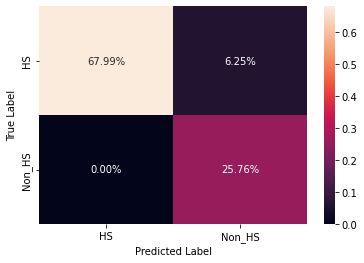

In [ ]:
fold = 0
acc = []

for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = Label[train_index], Label[test_index]

  # Training Classifier Model
  eclf1.fit(X_train,y_train)

  # Melakukan Prediksi
  y_predict = eclf1.predict(X_test)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

## Parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'mlp__activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'mlp__solver' : ['lbfgs', 'sgd','adam'],
    'mlp__learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'mlp__learning_rate_init' : [0.0001, 0.001, 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__C':[0.01, 0.1, 1, 10],
    'mnb__alpha':[0, 1, 2, 3],
    'voting': ['hard', 'soft']
    }

clf1 = MLPClassifier(random_state=1)
clf2 = SVC()
clf3 = MultinomialNB()

eclf1 = VotingClassifier(estimators=[('mlp', clf1), ('svc', clf2), ('mnb', clf3)], voting='hard')
clf = GridSearchCV(eclf1, parameters, cv=2, verbose=6)
clf.fit(df_vector, Label)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ..........mlp__activation=identity;, score=0.820 total time= 1.1min
[CV 2/2] END ..........mlp__activation=identity;, score=0.584 total time=  18.2s
[CV 1/2] END ..........mlp__activation=logistic;, score=0.818 total time= 1.1min
[CV 2/2] END ..........mlp__activation=logistic;, score=0.583 total time=  29.9s
[CV 1/2] END ..............mlp__activation=tanh;, score=0.820 total time= 1.1min
[CV 2/2] END ..............mlp__activation=tanh;, score=0.584 total time=  19.1s
[CV 1/2] END ..............mlp__activation=relu;, score=0.821 total time= 1.1min
[CV 2/2] END ..............mlp__activation=relu;, score=0.584 total time=  18.3s


GridSearchCV(cv=2,
             estimator=VotingClassifier(estimators=[('mlp',
                                                     MLPClassifier(random_state=1)),
                                                    ('svc', SVC()),
                                                    ('mnb', MultinomialNB())]),
             param_grid={'mlp__activation': ['identity', 'logistic', 'tanh',
                                             'relu']},
             verbose=6)

In [ ]:
eclf1 = clf.best_estimator_
clf.best_params_

{'mlp__activation': 'relu'}

1 Fold
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       640
           1       0.75      0.90      0.82       247

    accuracy                           0.89       887
   macro avg       0.86      0.89      0.87       887
weighted avg       0.90      0.89      0.89       887

Accuracy :  0.8895152198421646


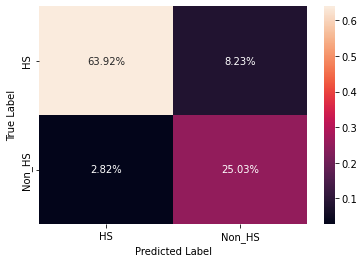

----------------------------------------------------------------------------------------------------
2 Fold
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       658
           1       0.71      0.93      0.81       229

    accuracy                           0.89       887
   macro avg       0.84      0.90      0.86       887
weighted avg       0.90      0.89      0.89       887

Accuracy :  0.8850056369785795


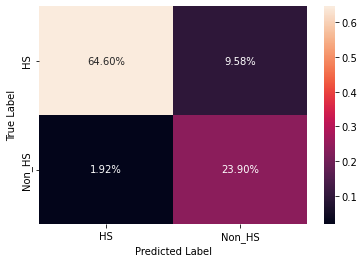

----------------------------------------------------------------------------------------------------
3 Fold
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       672
           1       0.65      0.90      0.75       215

    accuracy                           0.86       887
   macro avg       0.81      0.87      0.83       887
weighted avg       0.89      0.86      0.86       887

Accuracy :  0.8579481397970687


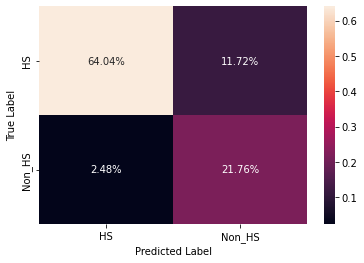

----------------------------------------------------------------------------------------------------
4 Fold
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       656
           1       0.71      0.93      0.80       230

    accuracy                           0.88       886
   macro avg       0.84      0.90      0.86       886
weighted avg       0.90      0.88      0.89       886

Accuracy :  0.8826185101580135


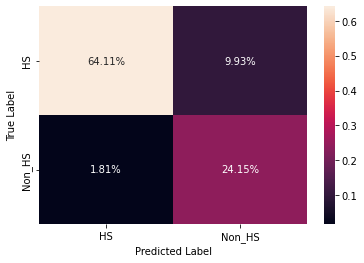

----------------------------------------------------------------------------------------------------
5 Fold
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       665
           1       0.67      0.92      0.78       221

    accuracy                           0.87       886
   macro avg       0.82      0.89      0.84       886
weighted avg       0.90      0.87      0.88       886

Accuracy :  0.8690744920993227


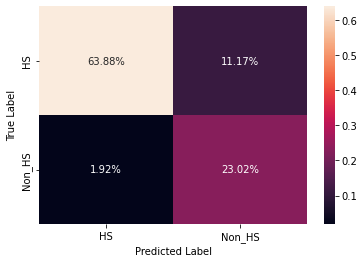

----------------------------------------------------------------------------------------------------
5 Fold Validation Mean Accuracy
akurasi tertinggi :  0.8895152198421646
akurasi terendah :  0.8579481397970687
rata-rata akurasi :  0.8768323997750297


In [ ]:
fold = 0
acc = []

for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = Label[train_index], Label[test_index]

  # Training Classifier Model
  eclf1.fit(X_train,y_train)

  # Melakukan Prediksi
  y_predict = eclf1.predict(X_test)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

# Predictions

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.model_selection import KFold

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.merge import concatenate
from keras.layers.recurrent import LSTM
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

!pip install keras-tuner --upgrade
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 11.9 MB/s 


k-fold Cross Validation

In [ ]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, random_state=1, shuffle=True)
kf.get_n_splits(df_vector)

5

## MLP Classifier ( Baseline )

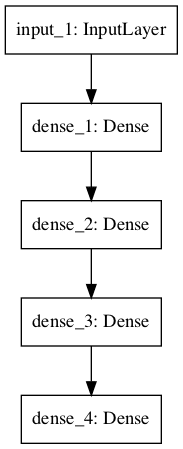

Multilayer Perceptron Graph

### Parameter Tuning menggunakan Keras Tuner

In [ ]:
def build_model(hp):
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],))
  hidden1 = Dense(hp.Choice('units', [8, 16, 32, 64, 128]), activation='relu')(visible)
  hidden2 = Dense(hp.Choice('units', [8, 16, 32, 64, 128]), activation='relu')(hidden1)
  hidden3 = Dense(hp.Choice('units', [8, 16, 32, 64, 128]), activation='relu')(hidden2)
  output = Dense(2, activation='sigmoid')(hidden3)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    directory="MLP",
    max_trials=100)

In [ ]:
y = OneHotEncoder(sparse=False)
labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))

tuner.search(df_vector, labels, epochs=10, validation_data=(df_vector, labels))
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 00m 09s]
val_accuracy: 0.981953501701355

Best val_accuracy So Far: 0.981953501701355
Total elapsed time: 00h 01m 22s
INFO:tensorflow:Oracle triggered exit


1 Fold
Epoch 1/5
111/111 [==============================] - 1s 3ms/step - loss: 0.0586 - accuracy: 0.9805
Epoch 2/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9851
Epoch 3/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9873
Epoch 4/5
111/111 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9910
Epoch 5/5
111/111 [==============================] - 0s 4ms/step - loss: 0.0264 - accuracy: 0.9924
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       640
           1       0.94      0.92      0.93       247

    accuracy                           0.96       887
   macro avg       0.96      0.95      0.95       887
weighted avg       0.96      0.96      0.96       887

Accuracy :  0.9627959413754228


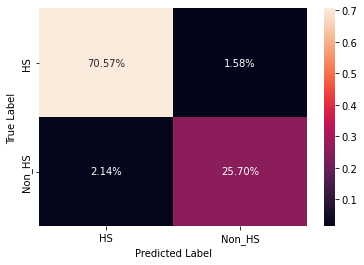

----------------------------------------------------------------------------------------------------
2 Fold
Epoch 1/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9859
Epoch 2/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9898
Epoch 3/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9932
Epoch 4/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9927
Epoch 5/5
111/111 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9941
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       658
           1       0.97      0.99      0.98       229

    accuracy                           0.99       887
   macro avg       0.98      0.99      0.99       887
weighted avg       0.99      0.99      0.99       887

Accuracy :  0.9887260428410372


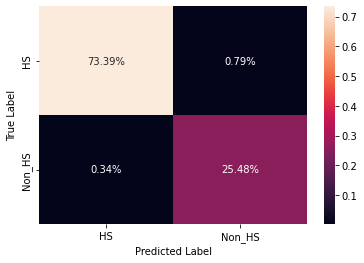

----------------------------------------------------------------------------------------------------
3 Fold
Epoch 1/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9932
Epoch 2/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9938
Epoch 3/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9955
Epoch 4/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9955
Epoch 5/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9961
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       672
           1       0.97      1.00      0.98       215

    accuracy                           0.99       887
   macro avg       0.99      0.99      0.99       887
weighted avg       0.99      0.99      0.99       887

Accuracy :  0.992108229988726


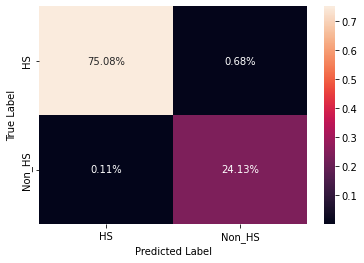

----------------------------------------------------------------------------------------------------
4 Fold
Epoch 1/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 2/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9958
Epoch 3/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9958
Epoch 4/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9958
Epoch 5/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9966
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       656
           1       0.99      0.99      0.99       230

    accuracy                           1.00       886
   macro avg       0.99      0.99      0.99       886
weighted avg       1.00      1.00      1.00       886

Accuracy :  0.9954853273137697


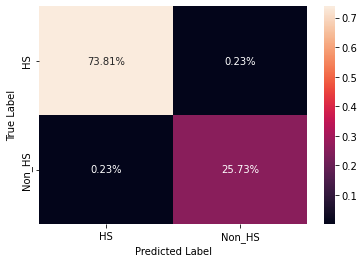

----------------------------------------------------------------------------------------------------
5 Fold
Epoch 1/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9944
Epoch 2/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9955
Epoch 3/5
111/111 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9946
Epoch 4/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9952
Epoch 5/5
111/111 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9958
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       665
           1       0.99      1.00      0.99       221

    accuracy                           1.00       886
   macro avg       0.99      1.00      1.00       886
weighted avg       1.00      1.00      1.00       886

Accuracy :  0.9966139954853274


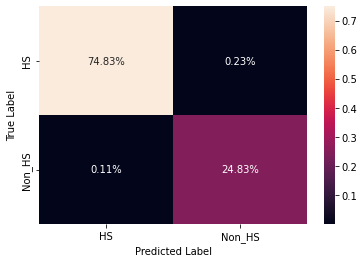

----------------------------------------------------------------------------------------------------
5 Fold Validation Mean Accuracy
akurasi tertinggi :  0.9966139954853274
akurasi terendah :  0.9627959413754228
rata-rata akurasi :  0.9871459074008566


In [ ]:
fold = 0
acc = []

for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

### Parameter Tuning Manual

#### Unit Tuning

##### Unit = 8

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],))
  hidden1 = Dense(8, activation='relu')(visible)
  hidden2 = Dense(8, activation='relu')(hidden1)
  hidden3 = Dense(8, activation='relu')(hidden2)
  output = Dense(2, activation='sigmoid')(hidden3)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

1 Fold


AttributeError: ignored

##### Unit = 16

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],))
  hidden1 = Dense(16, activation='relu')(visible)
  hidden2 = Dense(16, activation='relu')(hidden1)
  hidden3 = Dense(16, activation='relu')(hidden2)
  output = Dense(2, activation='sigmoid')(hidden3)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 32

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],))
  hidden1 = Dense(32, activation='relu')(visible)
  hidden2 = Dense(32, activation='relu')(hidden1)
  hidden3 = Dense(32, activation='relu')(hidden2)
  output = Dense(2, activation='sigmoid')(hidden3)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 64

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],))
  hidden1 = Dense(64, activation='relu')(visible)
  hidden2 = Dense(64, activation='relu')(hidden1)
  hidden3 = Dense(64, activation='relu')(hidden2)
  output = Dense(2, activation='sigmoid')(hidden3)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 128

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],))
  hidden1 = Dense(128, activation='relu')(visible)
  hidden2 = Dense(128, activation='relu')(hidden1)
  hidden3 = Dense(128, activation='relu')(hidden2)
  output = Dense(2, activation='sigmoid')(hidden3)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

## LSTM

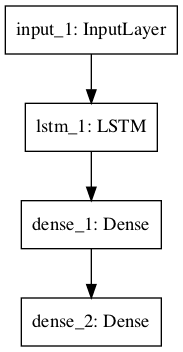

Recurrent Neural Network Graph

### Parameter Tuning menggunakan Keras Tuner

In [ ]:
def build_model(hp):
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],1))
  hidden1 = LSTM(hp.Choice('units', [8, 16, 32, 64, 128]))(visible)
  hidden2 = Dense(hp.Choice('units', [8, 16, 32, 64, 128]), activation='relu')(hidden1)
  output = Dense(2, activation='sigmoid')(hidden2)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
tuner_lstm = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    directory="lstm",
    max_trials=100)

In [ ]:
y = OneHotEncoder(sparse=False)
labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))

tuner_lstm.search(df_vector, labels, epochs=10, validation_data=(df_vector, labels))
best_model = tuner_lstm.get_best_models()[0]

1 Fold
Epoch 1/5
111/111 [==============================] - 211s 2s/step - loss: 0.6887 - accuracy: 0.7445
Epoch 2/5
111/111 [==============================] - 208s 2s/step - loss: 0.6779 - accuracy: 0.7473
Epoch 3/5
111/111 [==============================] - 209s 2s/step - loss: 0.6613 - accuracy: 0.7476
Epoch 4/5
111/111 [==============================] - 209s 2s/step - loss: 0.6210 - accuracy: 0.7476
Epoch 5/5
111/111 [==============================] - 208s 2s/step - loss: 0.5662 - accuracy: 0.7476
Classification Report
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       640
           1       0.00      0.00      0.00       247

    accuracy                           0.72       887
   macro avg       0.36      0.50      0.42       887
weighted avg       0.52      0.72      0.60       887

Accuracy :  0.7215332581736189


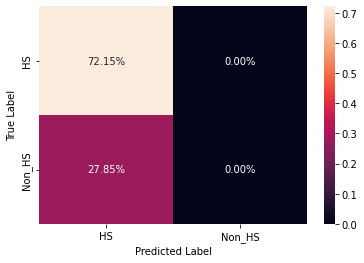

----------------------------------------------------------------------------------------------------
2 Fold
Epoch 1/5
111/111 [==============================] - 209s 2s/step - loss: 0.5715 - accuracy: 0.7425
Epoch 2/5
111/111 [==============================] - 210s 2s/step - loss: 0.5713 - accuracy: 0.7425
Epoch 3/5
111/111 [==============================] - 211s 2s/step - loss: 0.5711 - accuracy: 0.7425
Epoch 4/5
111/111 [==============================] - 212s 2s/step - loss: 0.5710 - accuracy: 0.7425
Epoch 5/5
111/111 [==============================] - 211s 2s/step - loss: 0.5709 - accuracy: 0.7425
Classification Report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       658
           1       0.00      0.00      0.00       229

    accuracy                           0.74       887
   macro avg       0.37      0.50      0.43       887
weighted avg       0.55      0.74      0.63       887

Accuracy :  0.741826381059752


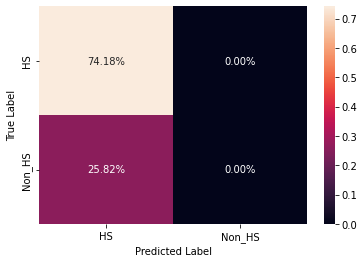

----------------------------------------------------------------------------------------------------
3 Fold
Epoch 1/5
111/111 [==============================] - 209s 2s/step - loss: 0.5748 - accuracy: 0.7386
Epoch 2/5
111/111 [==============================] - 209s 2s/step - loss: 0.5747 - accuracy: 0.7386
Epoch 3/5
111/111 [==============================] - 211s 2s/step - loss: 0.5747 - accuracy: 0.7386
Epoch 4/5
111/111 [==============================] - 210s 2s/step - loss: 0.5747 - accuracy: 0.7386
Epoch 5/5
111/111 [==============================] - 209s 2s/step - loss: 0.5745 - accuracy: 0.7386
Classification Report
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       672
           1       0.00      0.00      0.00       215

    accuracy                           0.76       887
   macro avg       0.38      0.50      0.43       887
weighted avg       0.57      0.76      0.65       887

Accuracy :  0.7576099210822999


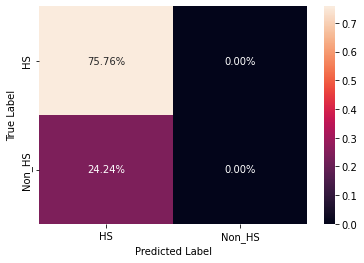

----------------------------------------------------------------------------------------------------
4 Fold
Epoch 1/5
111/111 [==============================] - 208s 2s/step - loss: 0.5700 - accuracy: 0.7429
Epoch 2/5
111/111 [==============================] - 209s 2s/step - loss: 0.5700 - accuracy: 0.7429
Epoch 3/5
111/111 [==============================] - 211s 2s/step - loss: 0.5699 - accuracy: 0.7429
Epoch 4/5
111/111 [==============================] - 209s 2s/step - loss: 0.5699 - accuracy: 0.7429
Epoch 5/5
111/111 [==============================] - 210s 2s/step - loss: 0.5699 - accuracy: 0.7429
Classification Report
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       656
           1       0.00      0.00      0.00       230

    accuracy                           0.74       886
   macro avg       0.37      0.50      0.43       886
weighted avg       0.55      0.74      0.63       886

Accuracy :  0.7404063205417607


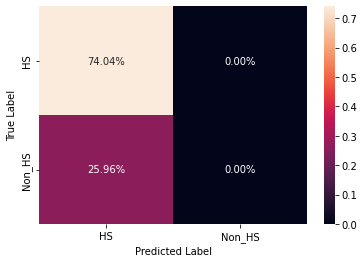

----------------------------------------------------------------------------------------------------
5 Fold
Epoch 1/5
111/111 [==============================] - 211s 2s/step - loss: 0.5724 - accuracy: 0.7403
Epoch 2/5
111/111 [==============================] - 208s 2s/step - loss: 0.5724 - accuracy: 0.7403
Epoch 3/5
111/111 [==============================] - 211s 2s/step - loss: 0.5724 - accuracy: 0.7403
Epoch 4/5
111/111 [==============================] - 224s 2s/step - loss: 0.5723 - accuracy: 0.7403
Epoch 5/5
111/111 [==============================] - 226s 2s/step - loss: 0.5723 - accuracy: 0.7403
Classification Report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       665
           1       0.00      0.00      0.00       221

    accuracy                           0.75       886
   macro avg       0.38      0.50      0.43       886
weighted avg       0.56      0.75      0.64       886

Accuracy :  0.7505643340857788


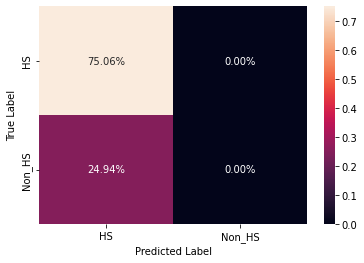

----------------------------------------------------------------------------------------------------
5 Fold Validation Mean Accuracy
akurasi tertinggi :  0.7576099210822999
akurasi terendah :  0.7215332581736189
rata-rata akurasi :  0.742388042988642


In [ ]:
fold = 0
acc = []
# Definisi Classifier
visible = Input(shape=(df_vector.shape[1],1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(2, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(1e-4),
    metrics = ['accuracy']
)

for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

### Parameter Tuning Manual

#### Unit Tuning

##### Unit = 8

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],1))
  hidden1 = LSTM(8)(visible)
  hidden2 = Dense(8, activation='relu')(hidden1)
  output = Dense(2, activation='sigmoid')(hidden2)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 16

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],1))
  hidden1 = LSTM(16)(visible)
  hidden2 = Dense(16, activation='relu')(hidden1)
  output = Dense(2, activation='sigmoid')(hidden2)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 32

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],1))
  hidden1 = LSTM(32)(visible)
  hidden2 = Dense(32, activation='relu')(hidden1)
  output = Dense(2, activation='sigmoid')(hidden2)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 64

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],1))
  hidden1 = LSTM(64)(visible)
  hidden2 = Dense(64, activation='relu')(hidden1)
  output = Dense(2, activation='sigmoid')(hidden2)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 128

In [ ]:
def build_model():
  # Definisi Classifier
  visible = Input(shape=(df_vector.shape[1],1))
  hidden1 = LSTM(128)(visible)
  hidden2 = Dense(128, activation='relu')(hidden1)
  output = Dense(2, activation='sigmoid')(hidden2)
  model = Model(inputs=visible, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

## Hybrid MLP-LSTM

### Parameter Tuning menggunakan Keras Tuner

In [ ]:
def build_model(hp):
  # Input Layer
  input = Input(shape=(df_vector.shape[1],))
  layer1 = Dense(10, activation='relu')(input)

  # Definisi MLP
  mlp_hidden1 = Dense(hp.Choice('units', [8, 16, 32, 64, 128]), activation='relu')(layer1)
  mlp_hidden2 = Dense(hp.Choice('units', [8, 16, 32, 64, 128]), activation='relu')(mlp_hidden1)
  mlp_hidden3 = Dense(hp.Choice('units', [8, 16, 32, 64, 128]), activation='relu')(mlp_hidden2)

  # Definisi RNN
  reshape = tf.keras.layers.Reshape((10,1))(layer1)
  lstm_hidden1 = LSTM(hp.Choice('units', [8, 16, 32, 64, 128]))(reshape)

  # merge feature extractors
  merge = concatenate([mlp_hidden3, lstm_hidden1])

  # interpretation layer
  interpretation = Dense(10, activation='relu')(merge)

  # output layer
  output = Dense(2, activation='sigmoid')(interpretation)

  model = Model(inputs=input, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
tuner_mlplstm = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    directory="mlplstm",
    max_trials=100)

In [ ]:
y = OneHotEncoder(sparse=False)
labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))

tuner_mlplstm.search(df_vector, labels, epochs=10, validation_data=(df_vector, labels))
best_model = tuner_mlplstm.get_best_models()[0]


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
16                |?                 |units

Epoch 1/10
139/139 [==============================] - 12s 68ms/step - loss: 0.6893 - accuracy: 0.5973 - val_loss: 0.6768 - val_accuracy: 0.7444
Epoch 2/10
139/139 [==============================] - 8s 56ms/step - loss: 0.6560 - accuracy: 0.7440 - val_loss: 0.6191 - val_accuracy: 0.7424
Epoch 3/10
139/139 [==============================] - 7s 52ms/step - loss: 0.5463 - accuracy: 0.7424 - val_loss: 0.4661 - val_accuracy: 0.7424
Epoch 4/10
117/139 [========================>.....] - ETA: 1s - loss: 0.4234 - accuracy: 0.7425

KeyboardInterrupt: ignored

1 Fold
Epoch 1/5
111/111 [==============================] - 3s 9ms/step - loss: 0.6676 - accuracy: 0.7363
Epoch 2/5
111/111 [==============================] - 1s 9ms/step - loss: 0.5968 - accuracy: 0.7476
Epoch 3/5
111/111 [==============================] - 1s 9ms/step - loss: 0.4804 - accuracy: 0.7476
Epoch 4/5
111/111 [==============================] - 1s 9ms/step - loss: 0.3928 - accuracy: 0.7476
Epoch 5/5
111/111 [==============================] - 1s 9ms/step - loss: 0.3513 - accuracy: 0.7476
Classification Report
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       640
           1       0.00      0.00      0.00       247

    accuracy                           0.72       887
   macro avg       0.36      0.50      0.42       887
weighted avg       0.52      0.72      0.60       887

Accuracy :  0.7215332581736189


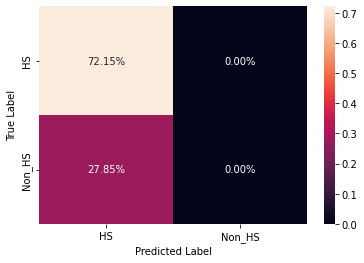

----------------------------------------------------------------------------------------------------
2 Fold
Epoch 1/5
111/111 [==============================] - 1s 9ms/step - loss: 0.3358 - accuracy: 0.7425
Epoch 2/5
111/111 [==============================] - 1s 9ms/step - loss: 0.3183 - accuracy: 0.7425
Epoch 3/5
111/111 [==============================] - 1s 9ms/step - loss: 0.3045 - accuracy: 0.7425
Epoch 4/5
111/111 [==============================] - 1s 9ms/step - loss: 0.2940 - accuracy: 0.7879
Epoch 5/5
111/111 [==============================] - 1s 9ms/step - loss: 0.2848 - accuracy: 0.8804
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       658
           1       0.87      0.56      0.68       229

    accuracy                           0.86       887
   macro avg       0.87      0.77      0.80       887
weighted avg       0.86      0.86      0.85       887

Accuracy :  0.8647125140924464


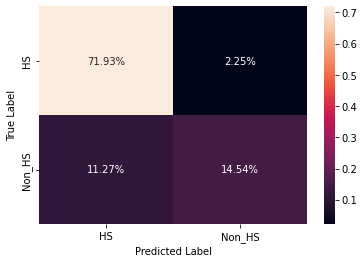

----------------------------------------------------------------------------------------------------
3 Fold
Epoch 1/5
111/111 [==============================] - 1s 9ms/step - loss: 0.2791 - accuracy: 0.9010
Epoch 2/5
111/111 [==============================] - 1s 9ms/step - loss: 0.2637 - accuracy: 0.9219
Epoch 3/5
111/111 [==============================] - 1s 9ms/step - loss: 0.2457 - accuracy: 0.9289
Epoch 4/5
111/111 [==============================] - 1s 9ms/step - loss: 0.2256 - accuracy: 0.9343
Epoch 5/5
111/111 [==============================] - 1s 9ms/step - loss: 0.2057 - accuracy: 0.9397
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       672
           1       0.82      0.87      0.85       215

    accuracy                           0.92       887
   macro avg       0.89      0.91      0.90       887
weighted avg       0.93      0.92      0.92       887

Accuracy :  0.923337091319053


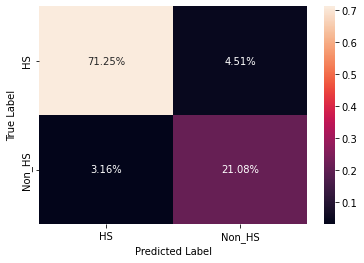

----------------------------------------------------------------------------------------------------
4 Fold
Epoch 1/5
111/111 [==============================] - 1s 12ms/step - loss: 0.1956 - accuracy: 0.9377
Epoch 2/5
111/111 [==============================] - 1s 9ms/step - loss: 0.1799 - accuracy: 0.9411
Epoch 3/5
111/111 [==============================] - 1s 9ms/step - loss: 0.1669 - accuracy: 0.9473
Epoch 4/5
111/111 [==============================] - 1s 9ms/step - loss: 0.1551 - accuracy: 0.9509
Epoch 5/5
111/111 [==============================] - 1s 9ms/step - loss: 0.1454 - accuracy: 0.9526
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       656
           1       0.86      0.91      0.88       230

    accuracy                           0.94       886
   macro avg       0.91      0.93      0.92       886
weighted avg       0.94      0.94      0.94       886

Accuracy :  0.9367945823927766


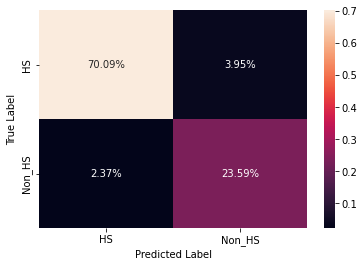

----------------------------------------------------------------------------------------------------
5 Fold
Epoch 1/5
111/111 [==============================] - 1s 9ms/step - loss: 0.1450 - accuracy: 0.9501
Epoch 2/5
111/111 [==============================] - 1s 9ms/step - loss: 0.1350 - accuracy: 0.9563
Epoch 3/5
111/111 [==============================] - 1s 9ms/step - loss: 0.1262 - accuracy: 0.9608
Epoch 4/5
111/111 [==============================] - 1s 9ms/step - loss: 0.1181 - accuracy: 0.9628
Epoch 5/5
111/111 [==============================] - 1s 9ms/step - loss: 0.1113 - accuracy: 0.9650
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       665
           1       0.88      0.95      0.92       221

    accuracy                           0.96       886
   macro avg       0.93      0.96      0.94       886
weighted avg       0.96      0.96      0.96       886

Accuracy :  0.9571106094808126


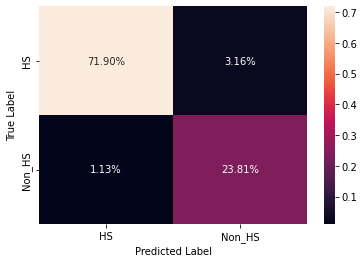

----------------------------------------------------------------------------------------------------
5 Fold Validation Mean Accuracy
akurasi tertinggi :  0.9571106094808126
akurasi terendah :  0.7215332581736189
rata-rata akurasi :  0.8806976110917415


In [ ]:
fold = 0
acc = []

for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

### Parameter Tuning Manual

#### Unit Tuning

##### Unit = 8

In [ ]:
def build_model():
  # Input Layer
  input = Input(shape=(df_vector.shape[1],))
  layer1 = Dense(10, activation='relu')(input)

  # Definisi MLP
  mlp_hidden1 = Dense(8, activation='relu')(layer1)
  mlp_hidden2 = Dense(8, activation='relu')(mlp_hidden1)
  mlp_hidden3 = Dense(8, activation='relu')(mlp_hidden2)

  # Definisi RNN
  reshape = tf.keras.layers.Reshape((10,1))(layer1)
  lstm_hidden1 = LSTM(8)(reshape)

  # merge feature extractors
  merge = concatenate([mlp_hidden3, lstm_hidden1])

  # interpretation layer
  interpretation = Dense(10, activation='relu')(merge)

  # output layer
  output = Dense(2, activation='sigmoid')(interpretation)

  model = Model(inputs=input, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 16

In [ ]:
def build_model():
  # Input Layer
  input = Input(shape=(df_vector.shape[1],))
  layer1 = Dense(10, activation='relu')(input)

  # Definisi MLP
  mlp_hidden1 = Dense(16, activation='relu')(layer1)
  mlp_hidden2 = Dense(16, activation='relu')(mlp_hidden1)
  mlp_hidden3 = Dense(16, activation='relu')(mlp_hidden2)

  # Definisi RNN
  reshape = tf.keras.layers.Reshape((10,1))(layer1)
  lstm_hidden1 = LSTM(16)(reshape)

  # merge feature extractors
  merge = concatenate([mlp_hidden3, lstm_hidden1])

  # interpretation layer
  interpretation = Dense(10, activation='relu')(merge)

  # output layer
  output = Dense(2, activation='sigmoid')(interpretation)

  model = Model(inputs=input, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 32

In [ ]:
def build_model():
  # Input Layer
  input = Input(shape=(df_vector.shape[1],))
  layer1 = Dense(10, activation='relu')(input)

  # Definisi MLP
  mlp_hidden1 = Dense(32, activation='relu')(layer1)
  mlp_hidden2 = Dense(32, activation='relu')(mlp_hidden1)
  mlp_hidden3 = Dense(32, activation='relu')(mlp_hidden2)

  # Definisi RNN
  reshape = tf.keras.layers.Reshape((10,1))(layer1)
  lstm_hidden1 = LSTM(32)(reshape)

  # merge feature extractors
  merge = concatenate([mlp_hidden3, lstm_hidden1])

  # interpretation layer
  interpretation = Dense(10, activation='relu')(merge)

  # output layer
  output = Dense(2, activation='sigmoid')(interpretation)

  model = Model(inputs=input, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 64

In [ ]:
def build_model():
  # Input Layer
  input = Input(shape=(df_vector.shape[1],))
  layer1 = Dense(10, activation='relu')(input)

  # Definisi MLP
  mlp_hidden1 = Dense(64, activation='relu')(layer1)
  mlp_hidden2 = Dense(64, activation='relu')(mlp_hidden1)
  mlp_hidden3 = Dense(64, activation='relu')(mlp_hidden2)

  # Definisi RNN
  reshape = tf.keras.layers.Reshape((10,1))(layer1)
  lstm_hidden1 = LSTM(64)(reshape)

  # merge feature extractors
  merge = concatenate([mlp_hidden3, lstm_hidden1])

  # interpretation layer
  interpretation = Dense(10, activation='relu')(merge)

  # output layer
  output = Dense(2, activation='sigmoid')(interpretation)

  model = Model(inputs=input, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))

##### Unit = 128

In [ ]:
def build_model():
  # Input Layer
  input = Input(shape=(df_vector.shape[1],))
  layer1 = Dense(10, activation='relu')(input)

  # Definisi MLP
  mlp_hidden1 = Dense(128, activation='relu')(layer1)
  mlp_hidden2 = Dense(128, activation='relu')(mlp_hidden1)
  mlp_hidden3 = Dense(128, activation='relu')(mlp_hidden2)

  # Definisi RNN
  reshape = tf.keras.layers.Reshape((10,1))(layer1)
  lstm_hidden1 = LSTM(128)(reshape)

  # merge feature extractors
  merge = concatenate([mlp_hidden3, lstm_hidden1])

  # interpretation layer
  interpretation = Dense(10, activation='relu')(merge)

  # output layer
  output = Dense(2, activation='sigmoid')(interpretation)

  model = Model(inputs=input, outputs=output)
  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(1e-4),
      metrics = ['accuracy']
  )
  return model

In [ ]:
fold = 0
acc = []
best_model = build_model()
for train_index, test_index in kf.split(df_vector):
  fold += 1
  print(f'{fold} Fold')
  y = OneHotEncoder(sparse=False)
  labels = pd.DataFrame(y.fit_transform(Label.reshape(-1, 1)))
  X_train, X_test = df_vector.iloc[train_index], df_vector.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], Label[test_index]

  # Training Classifier Model
  best_model.fit(X_train,y_train, epochs=5)

  # Melakukan Prediksi
  y_predict = np.argmax(best_model.predict(X_test),axis=1)

  # Membandingkan hasil Prediksi terhadap data asli
  print("Classification Report")
  print(classification_report(y_test,y_predict))
  print('Accuracy : ', accuracy_score(y_test,y_predict))
  acc.append(accuracy_score(y_test,y_predict))

  cnf_matrix = confusion_matrix(y_test,y_predict)
  s = sn.heatmap(cnf_matrix/np.sum(cnf_matrix),
            annot=True,
            fmt='.2%',
            xticklabels = ['HS', 'Non_HS'],
            yticklabels = ['HS', 'Non_HS'],
            );
  s.set_xlabel('Predicted Label');
  s.set_ylabel('True Label');
  plt.show()
  print('-'*100)

print('='*100)
print(f'{fold} Fold Validation Mean Accuracy')
print('akurasi tertinggi : ',np.max(acc))
print('akurasi terendah : ',np.min(acc))
print('rata-rata akurasi : ',np.mean(acc))